In [21]:
#import library dan package yang dibutuhkan

import pandas as pd #untuk dataframe
import pylab as plt #untuk plotting
import numpy as np #untuk perhitungan saintifik
from sklearn.linear_model import LinearRegression #import library LinearRegression dari scikit-learn
%matplotlib inline

In [8]:
df = pd.read_csv("FuelConsumption.csv") #membaca data

# melihat 5 baris pertama data
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
#kita ambil kolom mana saja yang akan kita analisis, dan membuang sisanya

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


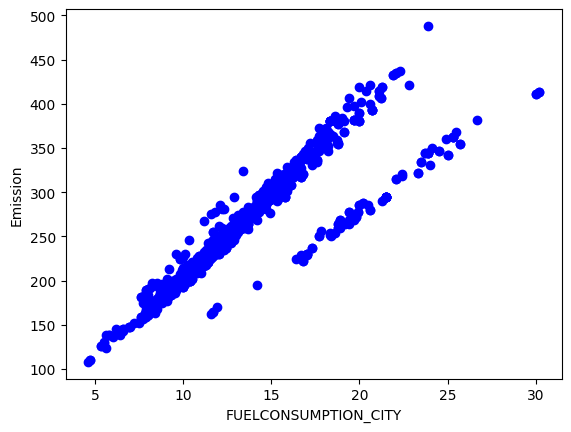

In [10]:
#Kita plot hubungannya

plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")
plt.show()   

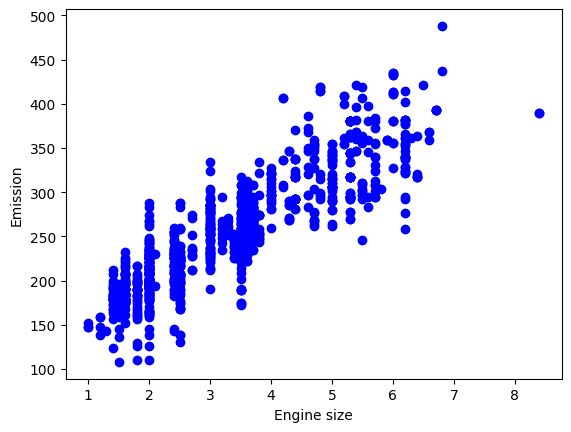

In [11]:
#Kita plot hubungannya

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [15]:
#Membagi data

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

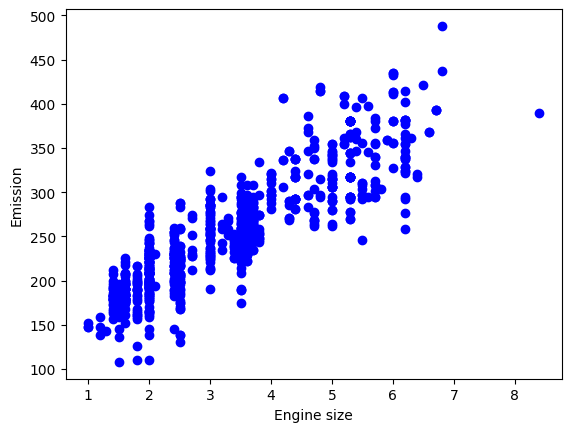

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [22]:
#Membuat model regresi
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# Koefisien model
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.14055786]]
Intercept:  [124.92668905]


Text(0, 0.5, 'Emission')

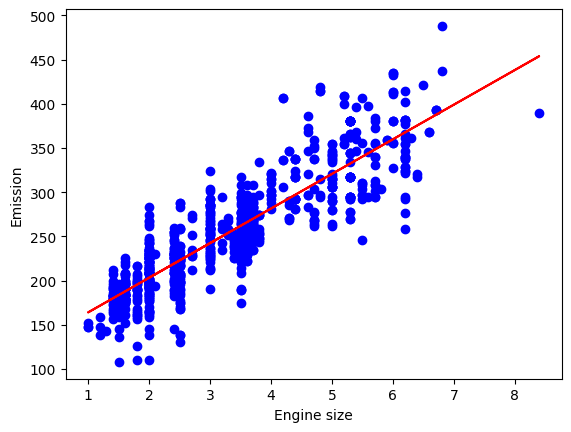

In [24]:
#Plot hasil regresi

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [25]:
#Menghitung error

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.33
Residual sum of squares (MSE): 1017.92
R2-score: 0.66
